In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Welcome to NumbaSOM

> A fast Self-Organizing Map Python library implemented in Numba.

This is a **fast and simple to use** SOM library. It utilizes online training (one data point at the time) rather than batch training. The implemented topologies are a simple 2D lattice or a torus.

## How to Install

To install this package with pip run:

`pip install numbasom`

To install this package with conda run:

`conda install -c mnikola numbasom`

## How to use

To import the library you can safely use:

In [ ]:
from numbasom import *

A **Self-Organizing Map** is often used to show the underlying structure in data. To show how to use the library, we will train it on 200 random 3-dimensional vectors (so we can render them as colors):

#### Create 200 random colors

In [ ]:
import numpy as np
data = np.random.random([200,3])

#### Initialize the library

We initalize a map with 50 rows and 100 columns. The default topology is a 2D lattice. We can also train it on a torus by setting `is_torus=True`

In [ ]:
som = SOM(som_size=(50,100), is_torus=False)

#### Train the SOM

We will adapt the lattice by iterating 10.000 times through our data points. If we set `normalize=True`, data will be normalized before training. 

In [ ]:
lattice = som.train(data, num_iterations=15000)

SOM training took: 1.360805 seconds.


#### To access an individual cell type

In [ ]:
lattice[5,3]

array([0.03490206, 0.20784277, 0.17107473])

#### To access multiple cells, slicing works

In [ ]:
lattice[1::6,1]

array([[0.04101962, 0.41159521, 0.08297097],
       [0.02298129, 0.19013015, 0.19437583],
       [0.03383474, 0.2750792 , 0.35548515],
       [0.13109233, 0.36215715, 0.41453517],
       [0.0600451 , 0.48835384, 0.43311779],
       [0.06109787, 0.57322387, 0.56854083],
       [0.0940788 , 0.82461743, 0.46202548],
       [0.03914962, 0.92128492, 0.32763747],
       [0.01108377, 0.96309806, 0.16963696]])

The shape of the lattice should be (50, 100, 3)

In [ ]:
lattice.shape

(50, 100, 3)

#### Visualizing the lattice

Since our lattice is made of 3-dimensional vectors, we can represent it as a lattice of colors.

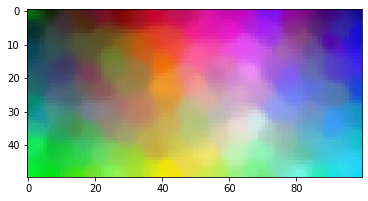

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

#### Compute U-matrix

Since the most of the data will not be 3-dimensional, we can use the `u_matrix` (unified distance matrix by Alfred Ultsch) to visualise the map and the clusters emerging on it. 

In [ ]:
um = u_matrix(lattice)

Each cell of the lattice is just a single value, thus the shape is:

In [ ]:
um.shape

(50, 100)

#### Plot U-matrix

The library contains a function `plot_u_matrix` that can help visualise it.

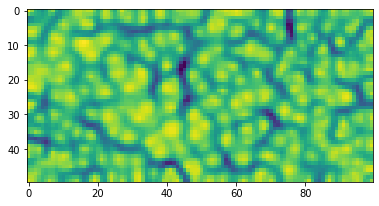

In [ ]:
plot_u_matrix(um, fig_size=(6.2,6.2))

#### Project on the lattice

To project data on the lattice, use `project_on_lattice` function.

Let's project a couple of predefined color on the trained lattice and see in which cells they will end up:

In [ ]:
colors = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.],[1.,1.,0.],[0.,1.,1.],[1.,0.,1.],[0.,0.,0.],[1.,1.,1.]])
color_labels = ['red', 'green', 'blue', 'yellow', 'cyan', 'purple','black', 'white']

In [ ]:
projection = project_on_lattice(colors, lattice, additional_list=color_labels)

for p in projection:
    if projection[p]:
        print (p, projection[p][0])

Projecting on SOM took: 0.207012 seconds.
(0, 7) black
(4, 38) red
(6, 61) purple
(8, 99) blue
(34, 66) white
(49, 5) green
(49, 40) yellow
(49, 99) cyan


#### Find every cell's closest vector in the data

To find every cell's closes vector in the provided data, use `lattice_closest_vectors` function.

We can again use the colors example:

In [ ]:
closest = lattice_closest_vectors(colors, lattice, additional_list=color_labels)

Finding closest data points took: 0.070424 seconds.


We can ask now to which value in `color_labels` are out lattice cells closest to:

In [ ]:
closest[(1,1)]

['black']

In [ ]:
closest[(5,5)]

['black']

We can find the closest vectors without supplying an additional list. Then we get the association between the lattice and the data vectors that we can display as colors.

In [ ]:
closest_vec = lattice_closest_vectors(colors, lattice)

Finding closest data points took: 0.003387 seconds.


We take the values of the `closest_vec` vector and reshape it into a numpy vector `values`.

In [ ]:
values = np.array(list(closest_vec.values())).reshape(50,100,-1)

We can now visualise the projection of our 8 hard-coded colors onto the lattice:

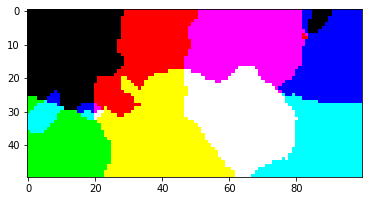

In [ ]:
plt.imshow(values)
plt.show()